# Differentially Private Top-$k$ selection

This notebook is part of the supplementary material for the following paper:
- **Title**: "Differentially Private Top-$k$ Selection via Stability on Unknown Domain"
- **Authors**: Ricardo Silva Carvalho, Ke Wang, Lovedeep Gondara, Miao Chun Yan
- **Venue**: 36th Conference on Uncertainty in Artificial Intelligence (UAI), 2020
- **URL**: To be added.

For contact, feel free to reach out to "ricardosc" at gmail dot com, or via [personal website](https://ricardocarvalhods.github.io/).

---

### Overview
- **Goal**: Perform differentially private top-k selection of most visited venues for dataset with locations of users.
- Private task selects locations/venues **without** compromising the privacy of users.
- We test different settings of differential privacy parameters $\varepsilon$ and $\delta$.
- We focus on unknown domain, i.e. we don't need info about complete domain and don't use any structural property from it.
- Mainly our algorithm Top Stable (TS) uses stability, plus other techniques, to select elements, only looking at the top-$\bar{k}$ for a given $\bar{k} \geq k$.
- TS is compared with Limited Domain (LD) from [David Durfee and Ryan Rogers, NeurIPS 2019](https://arxiv.org/pdf/1905.04273.pdf) that also works on unknown domain.

---

### Dataset
- Below we reproduce the results showed on the paper for:
  - Dataset: **Foursquare**, publicly available at https://sites.google.com/site/yangdingqi/home/foursquare-dataset.
  - Foursquare dataset is a mobile app where users check-in and write recommendations about venues.
  - More specifically, we used the data from "NYC and Tokyo Check-in Dataset" including long-term check-in data in New York City and Tokyo collected from Foursquare from April 2012 to February 2013.
  - Reference: Dingqi Yang, Daqing Zhang, Vincent W. Zheng, Zhiyong Yu. Modeling User Activity Preference by Leveraging User Spatial Temporal Characteristics in LBSNs. IEEE Trans. on Systems, Man, and Cybernetics: Systems, (TSMC), 45(1), 129-142, 2015.

---

## Data loading and preprocessing

In [1]:
from zipfile import ZipFile
import pandas as pd

data_dir = "./datasets/"

zip_file = ZipFile(data_dir + 'dataset_tsmc2014.zip')

df1 = pd.read_csv(zip_file.open('dataset_tsmc2014/dataset_TSMC2014_NYC.txt'), sep='\t', header=None,encoding = "ISO-8859-1")
df2 = pd.read_csv(zip_file.open('dataset_tsmc2014/dataset_TSMC2014_TKY.txt'), sep='\t', header=None,encoding = "ISO-8859-1")

df1.columns = ['userid','venid','vencatid','venname','lat','long','tz','time']
df1 = df1.drop(['vencatid','venname','lat','long','tz','time'], axis=1)
df1['val'] = 1
df1.drop_duplicates(inplace=True)

df2.columns = ['userid','venid','vencatid','venname','lat','long','tz','time']
df2 = df2.drop(['vencatid','venname','lat','long','tz','time'], axis=1)
df2['val'] = 1
df2.drop_duplicates(inplace=True)

df = pd.concat([df1,df2])
df.drop_duplicates(inplace=True)

nr_users = df['userid'].nunique()
df = df.groupby(['venid'], as_index=False)['val'].sum()

usr_counts = df['val'].values
usr_counts = usr_counts.astype('int32')
usr_counts = usr_counts[usr_counts.argsort()[::-1]]

## Experimental Evaluation

In [2]:
import sys
sys.path.append("./src/")

from experiment import run_experiment

### Tabulated results for Foursquare dataset

In [3]:
# Settings
delta = 1/nr_users

nr_trials = 2000
eps_list = [0.4, 0.8, 1.0]
k_list = [3, 10, 50]

In [4]:
run_experiment(usr_counts, eps_list, k_list, delta, nr_trials)


- epsilon =  0.4

k = 3
TS = P: 1.000 | S: 1.000
LD = P: 0.669 | S: 0.705

k = 10
TS = P: 0.647 | S: 0.753
LD = P: 0.692 | S: 0.801

k = 50
TS = P: 0.108 | S: 0.283
LD = P: 0.136 | S: 0.330

- epsilon =  0.8

k = 3
TS = P: 1.000 | S: 1.000
LD = P: 0.758 | S: 0.784

k = 10
TS = P: 0.900 | S: 0.938
LD = P: 0.863 | S: 0.915

k = 50
TS = P: 0.181 | S: 0.394
LD = P: 0.240 | S: 0.459

- epsilon =  1.0

k = 3
TS = P: 1.000 | S: 1.000
LD = P: 0.905 | S: 0.915

k = 10
TS = P: 0.901 | S: 0.939
LD = P: 0.961 | S: 0.976

k = 50
TS = P: 0.183 | S: 0.396
LD = P: 0.287 | S: 0.504


### Reproduction of Figure 1c:  Foursquare dataset, TS with "consistently worse" results than LD

In [5]:
nr_trials = 2000
eps_list = [1.0]
k_list = list(range(1,101))

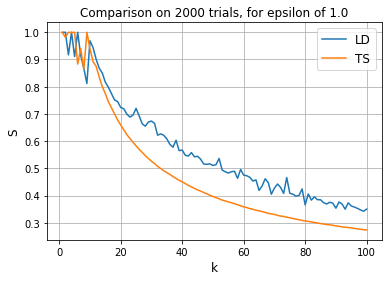

In [6]:
run_experiment(usr_counts, eps_list, k_list, delta, nr_trials, verbose=False, show_plot=True)

### Reproduction of Figure 1d:  Foursquare dataset, TS versus LD for "very large $k$"

In [7]:
nr_trials = 2000
eps_list = [1.0]
k_list = list(range(1,301))

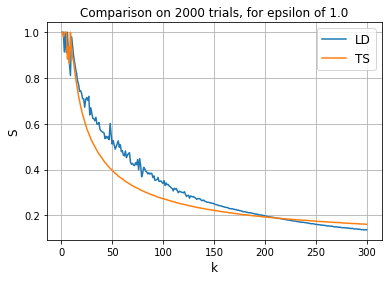

In [8]:
run_experiment(usr_counts, eps_list, k_list, delta, nr_trials, verbose=False, show_plot=True)